# Fuzzy Clustering Validation
Use this notebook to iterate quickly on the fuzzy clustering candidates defined in `configs/pipeline_fuzzy.yaml`.


# Old

Using the fcmeans library with cosine distance
//From a terminal or command prompt
python -m pip install fuzzy-c-means

In [1]:
import numpy as np
from fcmeans import FCM

# sample data – each row is a data point
X = np.array([[1, 0, 1],
              [0.9, 0.1, 0.8],
              [0.1, 1, 0],
              [0.2, 0.9, 0.1],
              [0.8, 0.2, 1],
              [0, 1, 0.2]])

# create a fuzzy c‑means model using cosine distance
fcm = FCM(n_clusters=2, m=2, distance='cosine', random_state=42)

# train the model
fcm.fit(X)

# fuzzy membership matrix (rows correspond to samples, columns to clusters)
u = fcm.u
print("Membership matrix:\n", u)

# hard labels: assign each point to the cluster with highest membership
labels = fcm.predict(X)
print("Hard cluster assignments:", labels)


Membership matrix:
 [[9.99986646e-01 1.33536180e-05]
 [9.99985417e-01 1.45827546e-05]
 [3.78429429e-05 9.99962157e-01]
 [8.95866021e-05 9.99910413e-01]
 [9.99894408e-01 1.05592205e-04]
 [1.52311665e-04 9.99847688e-01]]
Hard cluster assignments: [0 0 1 1 0 1]


Using scikit‑cmeans with cosine metric
//From a terminal or command prompt
python -m pip install scikit-cmeans

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
from skcmeans.algorithms import Probabilistic

# generate data
X, _ = make_blobs(n_samples=100, centers=3, n_features=4, random_state=0)
# X = np.array([[1, 0, 1],
#               [0.9, 0.8, 0.8],
#               [0.1, 1, 0.8],
#               [0.2, 0.9, 0.1],
#               [0.8, 0.2, 1],
#               [0, 1, 0.2]])

# create probabilistic fuzzy c‑means with cosine distance
clusterer = Probabilistic(n_clusters=5, metric='cosine', m=2, n_init=10)

# fit the model
clusterer.fit(X)

# membership matrix
memberships = clusterer.memberships
print("Membership matrix:\n", memberships)

# predicted cluster labels
labels = clusterer.calculate_memberships(X)
print("Predicted labels:", labels)


Membership matrix:
 [[9.16131005e-01 9.70458267e-04 8.71505902e-04 3.36149478e-03
  7.86655359e-02]
 [7.92057554e-02 6.60582877e-02 5.89380589e-02 7.26150157e-01
  6.96477407e-02]
 [8.85390233e-03 6.17830259e-01 3.49571892e-01 1.56463702e-02
  8.09757659e-03]
 [1.89533333e-01 3.48915989e-03 3.17854421e-03 1.21870213e-02
  7.91611941e-01]
 [8.75187036e-01 1.23319115e-03 1.10948396e-03 3.94398446e-03
  1.18526305e-01]
 [2.47435658e-03 3.56029839e-01 6.34997610e-01 4.20264598e-03
  2.29554884e-03]
 [3.24873088e-03 6.79226654e-01 3.08677671e-01 5.82633721e-03
  3.02060709e-03]
 [6.12673673e-03 5.91351073e-01 3.86242863e-01 1.06325772e-02
  5.64675024e-03]
 [3.51635548e-02 3.37950240e-02 3.02776859e-02 8.68099918e-01
  3.26638171e-02]
 [3.13929482e-04 8.89984802e-01 1.08843712e-01 5.66111557e-04
  2.91444440e-04]
 [4.24344402e-02 1.51718769e-02 1.35946463e-02 8.88675105e-01
  4.01239319e-02]
 [7.24317452e-02 2.05041392e-02 1.82294883e-02 8.24648413e-01
  6.41862147e-02]
 [5.67940309e-03 4.0

In [78]:
import numpy as np
from sklearn.datasets import make_blobs
from skcmeans.algorithms import Possibilistic  # 👈 change here

# generate data
X, _ = make_blobs(n_samples=100, centers=3, n_features=4, random_state=0)

# create possibilistic fuzzy c-means with cosine distance
clusterer = Possibilistic(
    n_clusters=5,
    metric='cosine',
    m=2,
    n_init=10
)
# X = np.array([[1, 0, 1],
#               [0.9, 0.8, 0.8],
#               [0.1, 1, 0.8],
#               [0.2, 0.9, 0.1],
#               [0.8, 0.2, 1],
#               [0, 1, 0.2]])

# fit the model
clusterer.fit(X)

# memberships (possibilistic, not forced to sum to 1)
memberships = clusterer.memberships
print("Membership matrix:\n", memberships)

# check the row sums
# print("Row sums:\n", memberships.sum(axis=1))

labels = clusterer.calculate_memberships(X)
print("Predicted labels:", labels)

hard_labels = clusterer.calculate_centers(X)
print("Hard labels:", hard_labels)


Membership matrix:
 [[0.19313677 0.19732592 0.19856658 0.17808308 0.18552195]
 [0.31043837 0.31534411 0.31679069 0.29232771 0.30137553]
 [0.14070586 0.14386485 0.14480301 0.12939771 0.13497794]
 [0.1771582  0.18100591 0.18214565 0.16333691 0.17016582]
 [0.18291479 0.18692198 0.18810919 0.16853035 0.17563556]
 [0.12264381 0.1254319  0.12626023 0.11267766 0.11759288]
 [0.13532593 0.13836867 0.13927235 0.12443661 0.12980965]
 [0.1358431  0.13890556 0.13981515 0.12488553 0.13029178]
 [0.38341108 0.38829209 0.38972898 0.36513799 0.37431912]
 [0.13311549 0.13611178 0.13700172 0.12239374 0.12768385]
 [0.56416133 0.5683336  0.56953982 0.5479185  0.55619989]
 [0.5669449  0.57233591 0.57389219 0.54604203 0.55667719]
 [0.12252741 0.12530804 0.12613411 0.1125866  0.11748959]
 [0.19002984 0.19413147 0.19534604 0.17528529 0.18257244]
 [0.15013642 0.15342    0.15439469 0.13835268 0.14417352]
 [0.13424934 0.13722924 0.13811411 0.1235725  0.12884323]
 [0.17601836 0.17992039 0.18107692 0.16202862 0.1689

In [17]:
row_sums = memberships.sum(axis=1)
print(row_sums)

[3.18676272 3.91226487 3.75998174 3.53809434 3.53557916 3.41856283]


In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.metrics import (
    silhouette_score,
    davies_bouldin_score,
    calinski_harabasz_score
)

from skcmeans.algorithms import Possibilistic

# sample data
X = np.array([
    [1, 0, 1],
    [0.9, 0.8, 0.8],
    [0.1, 1, 0.8],
    [0.2, 0.9, 0.1],
    [0.8, 0.2, 1],
    [0, 1, 0.2]
])

def evaluate_k_possibilistic(X, k_values, metric='cosine'):
    results = []

    for k in k_values:
        clusterer = Possibilistic(
            n_clusters=k,
            metric=metric,
            m=2,
            n_init=5,
            max_iter=1000
        )
        clusterer.fit(X)

        # hard labels from possibilistic memberships
        memberships = clusterer.memberships   # or .memberships_ depending on version
        hard_labels = memberships.argmax(axis=1)

        # --- METRICS ---
        sil = silhouette_score(X, hard_labels, metric=metric)
        db  = davies_bouldin_score(X, hard_labels)
        ch  = calinski_harabasz_score(X, hard_labels)

        results.append((k, sil, db, ch))

        print(f"k={k} | Silhouette={sil:.4f} | DBI={db:.4f} | CH={ch:.4f}")

    return results

# range of cluster numbers to test
k_values = range(2, 6)

results = evaluate_k_possibilistic(X, k_values)


# Best k by silhouette
best_k_sil = max(results, key=lambda t: t[1])[0]
best_k_db  = min(results, key=lambda t: t[2])[0]
best_k_ch  = max(results, key=lambda t: t[3])[0]

print("\n===== BEST k VALUES =====")
print(f"Best k (Silhouette): {best_k_sil}")
print(f"Best k (Davies–Bouldin): {best_k_db}")
print(f"Best k (Calinski–Harabasz): {best_k_ch}")


k=2 | Silhouette=0.7613 | DBI=0.5551 | CH=11.5660
k=3 | Silhouette=0.6107 | DBI=0.5341 | CH=7.0553
k=4 | Silhouette=0.2149 | DBI=0.5683 | CH=4.1579
k=5 | Silhouette=-0.3246 | DBI=1.3541 | CH=0.2708

===== BEST k VALUES =====
Best k (Silhouette): 2
Best k (Davies–Bouldin): 3
Best k (Calinski–Harabasz): 2


In [8]:
import numpy as np
X = np.array([
    [1, 0, 1],
    [0.9, 0.8, 0.8],
    [0.1, 1, 0.8],
    [0.2, 0.9, 0.1],
    [0.8, 0.2, 1],
    [0, 1, 0.2]
])

# New

In [1]:
# X, _ = make_blobs(n_samples=100, centers=3, n_features=5, random_state=100)
import numpy as np

# Load a real embedding matrix to test clustering on actual vectors
# 'data/embeddings/openai_large/embeddings.npy'
# 'data/embeddings/openai_small/embeddings.npy'
# 'data/embeddings/openai_ada/embeddings.npy'
# 
# 'data/embeddings/openai_large/umap_64/no_norm/embeddings.npy'
# 'data/embeddings/openai_large/umap_64/norm_l2/embeddings.npy' 
# 
# 'data/embeddings/openai_large/tsne_64/norm_l2/embeddings.npy'
# data/embeddings/openai_large/tsne_64/no_norm/embeddings.npy
try:
    embeddings = np.load('data/embeddings_iso_27002/openai_large/embeddings.npy')
except FileNotFoundError:
    embeddings = np.load('../data/embeddings_iso_27002/openai_large/embeddings.npy')

# Override X with the real embeddings for downstream steps
X = embeddings
print(f"Loaded embedding matrix with shape {X.shape}")


Loaded embedding matrix with shape (250, 3072)


In [6]:
import logging
import sys
from pathlib import Path

PROJECT_ROOT = Path("..").resolve()
if str(PROJECT_ROOT) not in sys.path:
    sys.path.append(str(PROJECT_ROOT))

logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s [%(levelname)s] %(name)s: %(message)s",
)

print(f"Project root: {PROJECT_ROOT}")


Project root: C:\Users\anoureldin\Desktop\TSP\eva-meta-question


[codecarbon WARNING @ 17:29:12] Multiple instances of codecarbon are allowed to run at the same time.


k=249 | Silhouette=0.0000
===== BEST k VALUES =====
Best k (Silhouette, max): 249 : 0.0


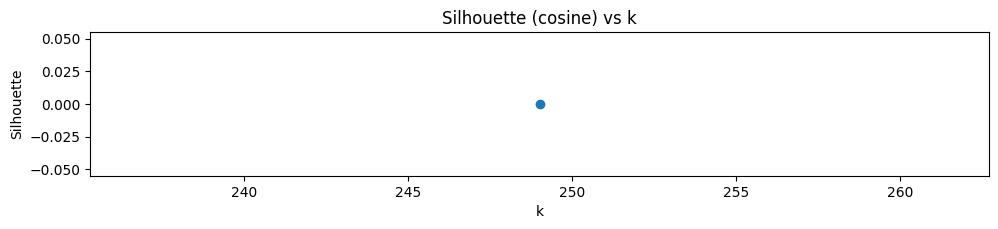

Energy run 20251208T162912 stored at C:\Users\anoureldin\Desktop\TSP\eva-meta-question\logs\energy\20251208T162912.jsonlTotal energy: 0.010814 kWh | Emissions: 0.000606 kg | Duration: 122.42 s | Estimated cost (@0.1200/kWh): 0.001298


In [7]:

import os
import numpy as np
from sklearn.metrics import silhouette_score
from skcmeans.algorithms import Possibilistic
import matplotlib.pyplot as plt
from contextlib import nullcontext

from src.utils.energy import energy_logger, summarize_energy_run

# your data


#
# ---------- EVALUATION OVER k ----------

def evaluate_k_possibilistic(
    X,
    k_values,
    metric='cosine',
    m=2.0,
    *,
    track_energy=True,
    return_energy=False,
    rate_per_kwh=None,
):
    results = []
    run_meta = {
        "k_values": list(k_values),
        "metric": metric,
        "m": m,
        "n_init": 100,
        "max_iter": 300,
    }
    outer_ctx = energy_logger.track("fuzzy.evaluate_k_possibilistic", run_meta) if track_energy else nullcontext()
    with outer_ctx:
        for k in k_values:
            inner_ctx = energy_logger.track("fuzzy.fit_possibilistic", {"k": k, "metric": metric, "m": m}) if track_energy else nullcontext()
            with inner_ctx:
                clusterer = Possibilistic(
                    n_clusters=k,
                    metric=metric,
                    m=m,
                    n_init=100,
                    max_iter=300,
                    random_state=43,
                )
                clusterer.fit(X)

            memberships = clusterer.memberships

            hard_labels = memberships.argmax(axis=1)
            unique_labels = np.unique(hard_labels)
            if unique_labels.size < 2:
                print(f"Skipping k={k}: only {unique_labels.size} cluster found (silhouette needs >= 2).")
                continue

            # sil = silhouette_score(X, hard_labels, metric=metric)
            sil = 0.0  # placeholder for silhouette score calculation
            results.append({
                "k": k,
                "silhouette": sil,
                "memberships": memberships,
            })

            print(f"k={k} | Silhouette={sil:.4f}")

        summary = None
        if return_energy and track_energy:
            summary = summarize_energy_run(energy_logger.run_id, rate_per_kwh=rate_per_kwh)

    return (results, summary) if return_energy else results


# ---------- RUN + PLOTS ----------

# k_values = range(50, len(X))
k_values = range(len(X) - 1, len(X))
results, energy_summary = evaluate_k_possibilistic(
    X,
    k_values,
    metric='cosine',
    m=1.0,
    track_energy=True,
    return_energy=True,
    rate_per_kwh=float(os.getenv("ENERGY_RATE_PER_KWH", "0.12")),
)

ks   = [r["k"] for r in results]
sils = [r["silhouette"] for r in results]

if len(sils) > 0:
    best_k_sil = ks[int(np.argmax(sils))]
    best_sil = np.max(sils)

    print("===== BEST k VALUES =====")
    print(f"Best k (Silhouette, max): {best_k_sil} : {best_sil}")

    plt.figure(figsize=(10, 6))

    plt.subplot(3, 1, 1)
    plt.plot(ks, sils, marker='o')
    plt.title("Silhouette (cosine) vs k")
    plt.xlabel("k")
    plt.ylabel("Silhouette")

    plt.tight_layout()
    plt.show()
else:
    print("error")

if energy_summary:
    print(
        "Energy run {run_id} stored at {log_path}"
        "Total energy: {total_energy_kwh:.6f} kWh | "
        "Emissions: {total_emissions_kg:.6f} kg | "
        "Duration: {total_duration_s:.2f} s | "
        "Estimated cost (@{rate_per_kwh:.4f}/kWh): {estimated_cost:.6f}"
        .format(**energy_summary)
    )


In [14]:
results

[{'k': 249,
  'silhouette': -0.0006076577701605856,
  'memberships': array([[3.48318379e-05, 3.61112825e-05, 3.47179464e-05, ...,
          2.96896583e-05, 3.69179963e-05, 3.42596122e-05],
         [3.20643219e-05, 3.59199416e-05, 3.20062850e-05, ...,
          3.02610863e-05, 3.62634415e-05, 3.42008060e-05],
         [3.28323453e-05, 3.63292120e-05, 3.17450191e-05, ...,
          3.05612630e-05, 3.54410931e-05, 3.44242131e-05],
         ...,
         [3.25129474e-05, 3.11409876e-05, 3.13873898e-05, ...,
          2.89176414e-05, 4.25812567e-05, 3.31822602e-05],
         [3.02118830e-05, 3.07345254e-05, 3.16507381e-05, ...,
          2.90942995e-05, 3.85041257e-05, 3.30482558e-05],
         [3.04037439e-05, 3.09282929e-05, 3.05010786e-05, ...,
          2.91922352e-05, 3.64045814e-05, 3.26402721e-05]])}]

In [3]:
def get_min_threashord(item):
    import numpy as np

    memberships = item["memberships"]   # for a given k

    max_per_cluster = memberships.max(axis=1)
    threshold = max_per_cluster.min()

    print("Dynamic threshold =", threshold)
    return threshold

def elbow_threshold(item):
    from kneed import KneeLocator
    import numpy as np

    vals = item["memberships"].flatten()
    vals_sorted = np.sort(vals)[::-1]

    kl = KneeLocator(
        range(len(vals_sorted)), vals_sorted,
        curve='convex', direction='decreasing'
    )
    threshold = vals_sorted[kl.knee]
    print("Elbow-based threshold =", threshold)

    return threshold

def elbow_threshold_simple(item, sample_index=0):
    from kneed import KneeLocator
    import numpy as np

    # take memberships for a single sample
    vals = item["memberships"][sample_index].ravel()
    vals_sorted = np.sort(vals)[::-1]

    kl = KneeLocator(
        range(len(vals_sorted)),
        vals_sorted,
        curve='convex',
        direction='decreasing'
    )

    # handle the case where no knee is found
    if kl.knee is None:
        # fallback: e.g. smallest value or some default
        threshold = vals_sorted[-1]
    else:
        threshold = vals_sorted[kl.knee]

    print(f"Elbow-based threshold for sample {sample_index} = {threshold}")
    return threshold

def percentile(item):
    import numpy as np

    vals = item["memberships"].flatten()
    threshold = np.percentile(vals, 99)   # or 85, 80, etc.

    print("Percentile threshold =", threshold)
    return threshold

In [5]:
# threshold = 0.2

sample_clusters = []   # will store the cluster sets for each sample

for item in results:
   
    k = item["k"]
    if k != len(X)-1:
        continue
    memberships = item["memberships"]
    # threshold = get_min_threashord(item)
    # threshold = elbow_threshold(item)
    

    print(f"\n=== k = {k} ===")
    sample_clusters = []

    for i, row in enumerate(memberships):
        threshold = elbow_threshold_simple(item,i)
        clusters = tuple(idx for idx, val in enumerate(row) if val >= threshold)
        sample_clusters.append(clusters)
        print(f"Sample {i}: {clusters}")    



=== k = 249 ===
Elbow-based threshold for sample 0 = 5.8827760955306746e-05
Sample 0: (23, 36)
Elbow-based threshold for sample 1 = 5.771252095807658e-05
Sample 1: (36, 79)
Elbow-based threshold for sample 2 = 5.687358226976633e-05
Sample 2: (33, 36)
Elbow-based threshold for sample 3 = 5.950197641246178e-05
Sample 3: (36, 197)
Elbow-based threshold for sample 4 = 5.871005538317686e-05
Sample 4: (36, 145)
Elbow-based threshold for sample 5 = 5.60713895696302e-05
Sample 5: (36, 150)
Elbow-based threshold for sample 6 = 5.66108239346307e-05
Sample 6: (36, 169)
Elbow-based threshold for sample 7 = 5.750565596580105e-05
Sample 7: (36, 185)
Elbow-based threshold for sample 8 = 5.79650812442404e-05
Sample 8: (36, 148)
Elbow-based threshold for sample 9 = 6.411548105178905e-05
Sample 9: (78, 212)
Elbow-based threshold for sample 10 = 5.884865558222113e-05
Sample 10: (7, 36)
Elbow-based threshold for sample 11 = 6.678970397451115e-05
Sample 11: (44, 45)
Elbow-based threshold for sample 12 = 5

In [6]:
import json


with open("clusters_run-2.json", "w") as f:
    json.dump(sample_clusters, f, indent=4)

In [17]:
import json

with open("clusters.json", "r") as f:
    sample_clusters = json.load(f)

In [ ]:
type(sample_clusters)

list

In [7]:
from collections import defaultdict

groups = defaultdict(list)

for sample_idx, clusters in enumerate(sample_clusters):
    for c in clusters:
        groups[c].append(sample_idx)

# Show result
for c, samples in sorted(groups.items()):
    print(f"cluster {c} = samples {samples}")

    

cluster 0 = samples [57]
cluster 1 = samples [234]
cluster 2 = samples [210]
cluster 3 = samples [15]
cluster 4 = samples [185]
cluster 5 = samples [137]
cluster 6 = samples [98]
cluster 7 = samples [10]
cluster 8 = samples [222]
cluster 9 = samples [179]
cluster 10 = samples [128]
cluster 11 = samples [29]
cluster 12 = samples [113, 163]
cluster 13 = samples [68, 142]
cluster 14 = samples [38]
cluster 15 = samples [37]
cluster 16 = samples [225]
cluster 17 = samples [235]
cluster 18 = samples [102]
cluster 19 = samples [245]
cluster 20 = samples [35, 68, 96, 97, 159]
cluster 21 = samples [17]
cluster 22 = samples [148]
cluster 23 = samples [0]
cluster 24 = samples [228]
cluster 25 = samples [156]
cluster 26 = samples [149]
cluster 27 = samples [249]
cluster 28 = samples [213]
cluster 29 = samples [152]
cluster 30 = samples [134]
cluster 31 = samples [189]
cluster 32 = samples [68, 201]
cluster 33 = samples [2]
cluster 34 = samples [184]
cluster 35 = samples [130]
cluster 36 = samples 

In [8]:
i = 0
for c, samples in sorted(groups.items()):
    if len(samples)>1:
        i+=1
        print(f"cluster {c} = samples {samples}")
print(i)

cluster 12 = samples [113, 163]
cluster 13 = samples [68, 142]
cluster 20 = samples [35, 68, 96, 97, 159]
cluster 32 = samples [68, 201]
cluster 36 = samples [0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 13, 14, 20, 21, 22, 23, 24, 25, 26, 27, 29, 31, 34, 41, 44, 48, 55, 57, 65, 66, 67, 68, 71, 75, 76, 77, 79, 88, 90, 91, 93, 94, 99, 100, 102, 104, 105, 106, 107, 108, 110, 111, 114, 115, 116, 117, 118, 123, 124, 127, 128, 129, 130, 132, 133, 135, 136, 137, 138, 139, 140, 142, 143, 144, 146, 147, 148, 149, 150, 151, 152, 153, 158, 164, 168, 169, 170, 171, 172, 173, 174, 176, 177, 178, 181, 183, 184, 185, 186, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 204, 207, 208, 211, 213, 214, 215, 216, 218, 221, 223, 224, 225, 226, 227, 228, 230, 231, 232, 233, 234, 235, 236, 237, 239, 240, 241, 242, 246]
cluster 39 = samples [68, 122]
cluster 41 = samples [56, 68, 81, 82, 83, 220]
cluster 42 = samples [61, 68, 69]
cluster 44 = samples [11, 68]
cluster 45 = samples [11, 12, 16, 17, 28, 30, 32, 3

In [10]:
import logging
import sys
from pathlib import Path

PROJECT_ROOT = Path("..").resolve()
if str(PROJECT_ROOT) not in sys.path:
    sys.path.append(str(PROJECT_ROOT))

logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s [%(levelname)s] %(name)s: %(message)s",
)

print(f"Project root: {PROJECT_ROOT}")


Project root: C:\Users\anoureldin\Desktop\TSP\eva-meta-question


In [11]:
import json
from typing import List

from src.app.llm.models.group_questions import GroupQuestion
group_questions: List[GroupQuestion] = []

# Load the JSONL file into a list
with open(f"C:/Users/anoureldin/Desktop/TSP/eva-meta-question/data/processed/iso_27002.jsonl", "r", encoding="utf-8") as f:
    docs = [json.loads(line) for line in f]
cluster_questions = {}
for c, samples in groups.items():
    texts = []
    for idx in samples:
        if 0 <= idx < len(docs):
            texts.append(docs[idx]["text"])
        else:
            print(f"Warning: index {idx} out of range for docs")
    cluster_questions[c] = texts
    # Create the Pydantic model
    group_questions.append(
        GroupQuestion(
            id= str(c),
            questions=texts
        )
    )

In [24]:
group_questions

new_questions_list = []

for q in group_questions:
    if q.id in ['147', '83', '45', '7']:
        new_questions_list.append(q)


In [25]:
new_questions_list

[GroupQuestion(id='7', questions=['Are teleworking arrangements risk assessed and controlled?']),
 GroupQuestion(id='45', questions=['Are security requirements defined for remote access equipment?', 'Are background verification checks conducted on new employees?', 'Is ongoing security awareness conducted?', 'Is disciplinary action defined for security violations?', 'Is removable media usage restricted and monitored?', 'Are media transfers tracked and protected?', 'Are digital media subject to authorized encryption?', 'Is user registration managed under formal procedures?', 'Are user access rights reviewed periodically?', 'Are shared accounts avoided or strictly controlled?', 'Is strong authentication implemented?', 'Are password requirements enforced according to policy?', 'Is password reuse restricted?', 'Are default vendor passwords changed before deployment?', 'Are access rights monitored to detect anomalies?', 'Are access control violations logged and investigated?', 'Are applicati

In [12]:
from src.app.llm.group_extractor import GroupOrchestrator


llm_config_path = "C:/Users/anoureldin/Desktop/TSP/eva-meta-question/configs/llm.yaml"


orchestrator = GroupOrchestrator(str(llm_config_path))
# 

c:\Users\anoureldin\AppData\Local\anaconda3\envs\.venv_embedding\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [17]:
raw_state = orchestrator.invoke(new_questions_list)

[codecarbon WARNING @ 16:24:06] Multiple instances of codecarbon are allowed to run at the same time.
C:\Users\anoureldin\Desktop\TSP\eva-meta-question\src\app\llm\group_extractor.py:108: UserWarning: Parameters {'seed'} should be specified explicitly. Instead they were passed in as part of `model_kwargs` parameter.
  self._llm = connector()
2025-11-28 16:24:10,499 [INFO] httpx: HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-11-28 16:24:11,544 [INFO] httpx: HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-11-28 16:24:12,128 [INFO] httpx: HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-11-28 16:24:12,797 [INFO] httpx: HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Run log saved to C:\Users\anoureldin\Desktop\TSP\eva-meta-question\logs\llm_orchestration.log


In [13]:
raw_state = orchestrator.invoke(group_questions)

[codecarbon WARNING @ 12:02:19] Multiple instances of codecarbon are allowed to run at the same time.
C:\Users\anoureldin\Desktop\TSP\eva-meta-question\src\app\llm\group_extractor.py:108: UserWarning: Parameters {'seed'} should be specified explicitly. Instead they were passed in as part of `model_kwargs` parameter.
  self._llm = connector()
2025-12-02 12:02:23,462 [INFO] httpx: HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-12-02 12:02:24,663 [INFO] httpx: HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-12-02 12:02:25,508 [INFO] httpx: HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-12-02 12:02:26,356 [INFO] httpx: HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-12-02 12:02:27,145 [INFO] httpx: HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-12-02 12:02:27,760 [INFO] httpx: HTTP Request: POST https://a

Run log saved to C:\Users\anoureldin\Desktop\TSP\eva-meta-question\logs\llm_orchestration.log


In [14]:
with open("clusters_labeling_results_open_ai_iso_27002_run_2.json", "w") as f:
    json.dump(raw_state, f, indent=4)

In [49]:
import json

with open("clusters_labeling_results.json", "r") as f:
    raw_state = json.load(f)

In [ ]:
raw_state["results"]

{'27': ['fraud response', 'documentation', 'testing'],
 '235': ['automated alerts',
  'suspicious activity monitoring',
  'financial activity'],
 '157': ['logging', 'review', 'privileged access', 'financial systems'],
 '189': ['segregation of duties', 'financial processes', 'access controls'],
 '19': ['fraud prevention', 'financial systems', 'security controls'],
 '155': ['risk management', 'supplier management'],
 '181': ['supplier certification',
  'compliance requirements',
  'security standards'],
 '57': [],
 '159': [],
 '138': ['third-party risk', 'procurement', 'cyber risk management'],
 '224': ['penetration testing', 'network security'],
 '128': ['penetration testing', 'issue tracking', 'remediation'],
 '167': ['penetration testing', 'change management'],
 '17': ['penetration testing', 'third-party assessment', 'audit frequency'],
 '1': ['security culture', 'measurement', 'leadership reporting'],
 '102': ['employee training', 'awareness testing'],
 '132': ['executive training', 

In [30]:
sample_clusters

[[23, 36],
 [36, 79],
 [33, 36],
 [36, 197],
 [36, 145],
 [36, 150],
 [36, 169],
 [36, 185],
 [36, 148],
 [78, 212],
 [7, 36],
 [44, 45],
 [45, 92],
 [36, 149],
 [36, 164],
 [3, 82],
 [45, 244],
 [21, 45],
 [137, 212],
 [72, 212],
 [36, 113],
 [36, 246],
 [36, 94],
 [36, 175],
 [36, 171],
 [36, 141],
 [36, 120],
 [36, 187],
 [45, 206],
 [11, 36],
 [45, 114],
 [36, 151],
 [45, 216],
 [116, 212],
 [36, 226],
 [20, 234],
 [45, 221],
 [15, 212],
 [14, 45],
 [58, 212],
 [45, 161],
 [36, 75],
 [45, 158],
 [45, 103],
 [36, 106],
 [45, 86],
 [45, 96],
 [45, 201],
 [36, 210],
 [45, 247],
 [45, 121],
 [45, 243],
 [45, 177],
 [45, 112],
 [43, 45],
 [36, 52],
 [41, 85],
 [0, 36],
 [45, 245],
 [54, 203],
 [45, 214],
 [42, 203],
 [53, 203],
 [45, 153],
 [45, 248],
 [36, 45],
 [36, 65],
 [36, 47],
 [13,
  20,
  32,
  36,
  39,
  41,
  42,
  44,
  45,
  47,
  50,
  53,
  54,
  56,
  59,
  63,
  65,
  67,
  83,
  114,
  115,
  117,
  118,
  123,
  133,
  136,
  146,
  151,
  163,
  188,
  203,
  212,
 

In [15]:
final_results = []

for question_index, clusters in enumerate(sample_clusters):
    print(docs[question_index]["text"])
    
    labels = set()   # <-- changed from list to set
    
    for index in clusters:
        labels.update(raw_state["results"][str(index)])
    
    print(labels)

    final_results.append(
        {
            "id": docs[question_index]["id"],
            "text": docs[question_index]["text"],
            "title": docs[question_index]["title"],
            "label": list(labels)   # <-- convert back to list
        }
    )


Is there a formal, approved information security policy outlining control objectives and requirements?
{'information security policy'}
Is the information security policy reviewed at planned intervals?
{'policy review', 'review frequency', 'information security policy'}
Are all relevant stakeholders aware of the information security policy?
{'information security policy'}
Are procedures available to implement the information security policy?
{'procedures', 'information security policy'}
Is an information security management framework established?
{'information security', 'management framework'}
Are information security roles clearly defined?
{'information security roles', 'role definition'}
Are conflicts of interest avoided through segregation of duties?
{'segregation of duties', 'conflict of interest'}
Is contact established with cybersecurity authorities?
{'communication procedures', 'cybersecurity authorities'}
Is contact maintained with threat-intelligence communities and industry g

In [32]:
final_results

[{'id': 'doc_201',
  'text': 'Is there a formal, approved information security policy outlining control objectives and requirements?',
  'title': '5.1 Information Security Policies',
  'label': ['information security policy']},
 {'id': 'doc_202',
  'text': 'Is the information security policy reviewed at planned intervals?',
  'title': '5.1 Information Security Policies',
  'label': ['information security policy']},
 {'id': 'doc_203',
  'text': 'Are all relevant stakeholders aware of the information security policy?',
  'title': '5.1 Information Security Policies',
  'label': ['stakeholder awareness', 'information security policy']},
 {'id': 'doc_204',
  'text': 'Are procedures available to implement the information security policy?',
  'title': '5.1 Information Security Policies',
  'label': ['procedures', 'information security policy']},
 {'id': 'doc_205',
  'text': 'Is an information security management framework established?',
  'title': '6.1 Internal Organization',
  'label': ['inf

In [16]:
with open("labeling_results_openai_iso_27002-run_2.json", "w") as f:
    json.dump(final_results, f, indent=4)